# 90-803 Machine Learning Foundations with Python
# Final Group Project 
# Team 5 members: Apoorva Shetty, Enze Zhao, Yilin Lyu
# Team name: team5_AS_EZZ_YL
# Spring 2023

## Overview 

Our primary source is Delphi CovidCast data (Linked in references Below) and we derive Health Care Expenditure per capita and Political leaning of US States from different sources. Below is a list of all the relevant columns across the data sources that we would be arriving at.

## Code

In [1]:
# Pre-Requisite : Run : pip install covidcast on Anaconda Command Prompt
# Data Source directory : https://cmu-delphi.github.io/delphi-epidata/api/covidcast_signals.html

import covidcast
from datetime import date
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
ov = pd.read_csv('data/Codebook.csv')

ov

,Type,Final Column Name,Desc,Source,Signal,Method of extraction
0,Hospital Admissions,"daily admission per 100,000 population",Hosptial admissions for adult and pediatric in...,hhs,confirmed_admissions_covid_1d_prop_7dav,API
1,Daily New Deaths,"confirmed daily deaths per 100,000",Daily death for adult and pediatric in state b...,jhu-csse,deaths_7dav_incidence_prop,API
2,Positive Covid Tests,test_positive all ages,Percentage of antigen tests that were positive...,quidel,covid_ag_smoothed_pct_positive,API
3,Vaccine Acceptance,people_fully_vaccined,People fully vaccinated includes those who hav...,delphi US COVID-19 Trends and Impact Survey,smoothed_covid_vaccinated,CSV
4,Mask use,mask_wearing,Mask wearing in public Estimated percentage of...,fb-survey,smoothed_wwearing_mask_7d\t,CSV
5,Social Distancing and Travel : Public transit,public_transit,Estimated percentage of respondents who “used ...,fb-survey,smoothed_public_transit_1d,CSV
6,Kids in school,inperson_school_fulltime,Estimated percentage of people who had any chi...,fb-survey,\tsmoothed_inperson_school_fulltime,CSV
7,Visits to the doctor about Covid-related symptoms,doc_visit,Estimated percentage of outpatient doctor visi...,chng,smoothed_outpatient_cli,API
8,Google-Search Trends for Covid Symptoms,google_search,"Symptoms : Nasal congestion, Post nasal drip, ...",google-symptoms,s02_raw_search,API
9,Health care Expenditure,HS_percapita,Health Spending Per Capita includes spending f...,NaN,NaN,CSV


## Health Outcome Data

### 1. Hospital Admissions

* my first data source: confirmed_admissions_covid_1d_prop_7dav, which means hosptial admissions for adult and pediatric in state based daily, per 100,000 population

By looking at this dataframe, we want a few features from this dataset instead of all of them
* what we want : geo_value, time_value, and value

In [3]:
# Reading from hhs signal of covidcast API

#data_Admissions = covidcast.signal("hhs", "confirmed_admissions_covid_1d_prop_7dav", date(2020, 5, 1), date(2023, 2, 7),
                        #"state")
#data_Admissions = pd.DataFrame(data_Admissions)

#data_Admissions = data_Admissions.rename(columns={'geo_value': 'state', 'time_value': 'date','value': 'daily admission per 100,000 population'})
#data_Admissions.to_csv('data_Admissions.csv',index=False)

In [4]:
data_Admissions = pd.read_csv('data_Admissions.csv')
data_Admissions.head() # print the first 5 rows of the dataset after renaming the columne. 


,state,signal,date,issue,lag,missing_value,missing_stderr,missing_sample_size,"daily admission per 100,000 population",stderr,sample_size,geo_type,data_source
0,ak,confirmed_admissions_covid_1d_prop_7dav,2020-05-01,2023-04-13,1077,5,5,5,NaN,NaN,NaN,state,hhs
1,al,confirmed_admissions_covid_1d_prop_7dav,2020-05-01,2023-04-13,1077,5,5,5,NaN,NaN,NaN,state,hhs
2,ar,confirmed_admissions_covid_1d_prop_7dav,2020-05-01,2023-04-13,1077,0,5,5,0.0,NaN,NaN,state,hhs
3,az,confirmed_admissions_covid_1d_prop_7dav,2020-05-01,2023-04-13,1077,5,5,5,NaN,NaN,NaN,state,hhs
4,ca,confirmed_admissions_covid_1d_prop_7dav,2020-05-01,2023-04-13,1077,5,5,5,NaN,NaN,NaN,state,hhs


In [5]:
#sort the data in descending order, which means to have the time value listed from the most recent to the earlist. 
data_Admissions.sort_values(by=['date'],ascending=False)

,state,signal,date,issue,lag,missing_value,missing_stderr,missing_sample_size,"daily admission per 100,000 population",stderr,sample_size,geo_type,data_source
54222,wy,confirmed_admissions_covid_1d_prop_7dav,2023-02-07,2023-04-13,65,0,5,5,0.343449,NaN,NaN,state,hhs
54181,hi,confirmed_admissions_covid_1d_prop_7dav,2023-02-07,2023-04-13,65,0,5,5,0.873181,NaN,NaN,state,hhs
54193,mn,confirmed_admissions_covid_1d_prop_7dav,2023-02-07,2023-04-13,65,0,5,5,0.964612,NaN,NaN,state,hhs
54192,mi,confirmed_admissions_covid_1d_prop_7dav,2023-02-07,2023-04-13,65,0,5,5,0.881520,NaN,NaN,state,hhs
54191,me,confirmed_admissions_covid_1d_prop_7dav,2023-02-07,2023-04-13,65,0,5,5,0.973443,NaN,NaN,state,hhs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,nv,confirmed_admissions_covid_1d_prop_7dav,2020-05-01,2023-04-13,1077,0,5,5,4.206154,NaN,NaN,state,hhs
32,nm,confirmed_admissions_covid_1d_prop_7dav,2020-05-01,2023-04-13,1077,5,5,5,NaN,NaN,NaN,state,hhs
31,nj,confirmed_admissions_covid_1d_prop_7dav,2020-05-01,2023-04-13,1077,5,5,5,NaN,NaN,NaN,state,hhs
30,nh,confirmed_admissions_covid_1d_prop_7dav,2020-05-01,2023-04-13,1077,5,5,5,NaN,NaN,NaN,state,hhs


i renamed the column names for geo_value to state since this data source is state based, renamed time_value as date since the format of the date is year-month-date, and value coloume represent the daily admission per 100,000, ignore the rest column names because these three columns are the ones i need to further analysis. 

In [6]:
print(data_Admissions['daily admission per 100,000 population'].describe())

count    50571.000000
mean         1.865759
std          1.661866
min         -0.058788
25%          0.806993
50%          1.346331
75%          2.342569
max         13.560617
Name: daily admission per 100,000 population, dtype: float64


calculating some statistical data such as percentile, mean and std of the numerical values of this dataframe

In [7]:
print(data_Admissions['daily admission per 100,000 population'].median())

1.3463309


printing out the meidian number for this column, and then compare the median with mean, we can tell that median is smaller than mean which means the data is skewed, then the distribution is skwewed to the right. 

In [8]:
data_Admissions.fillna(data_Admissions['daily admission per 100,000 population'].median(), inplace = True)

since the data is skwewed, i decided to use median to fill in missing value

In [9]:
data_Admissions.isnull().sum()# check again to see if there is still missing values

state                                     0
signal                                    0
date                                      0
issue                                     0
lag                                       0
missing_value                             0
missing_stderr                            0
missing_sample_size                       0
daily admission per 100,000 population    0
stderr                                    0
sample_size                               0
geo_type                                  0
data_source                               0
dtype: int64

In [10]:
data_Admissions_merge = data_Admissions[['state', 'date', 'daily admission per 100,000 population']]

I create a new dataframe here to select and merge columns: state admission, date_admission, and daily admission per 100,000 population, which are the three columns that I needed. 

In [11]:

print('Shape',data_Admissions_merge.shape)

data_Admissions_merge.head()

Shape (54223, 3)


,state,date,"daily admission per 100,000 population"
0,ak,2020-05-01,1.346331
1,al,2020-05-01,1.346331
2,ar,2020-05-01,0.000000
3,az,2020-05-01,1.346331
4,ca,2020-05-01,1.346331


### 2. Daily New Deaths

Deaths_7dav_incidence_prop, which means number of new confirmed deaths due to covid-19, per 100,000 *population daily by looking at this dataframe, we want a few features from this dataset instead of all of them

* What we want : geo_value, time_value, and value

In [12]:
# Reading daily new deaths from john hopkins source of covidcast API

#data_Deaths = covidcast.signal("jhu-csse", "deaths_7dav_incidence_prop", date(2020, 5, 1), date(2023, 2, 7),
                        #"state")
#data_Deaths = pd.DataFrame(data_Deaths)

#data_Deaths = data_Deaths.rename(columns={'geo_value': 'state', 'time_value': 'date','value': 'confirmed daily deaths per 100,000'})

#data_Deaths.to_csv('data_Deaths.csv',index=False)


In [13]:
# Reading Data Deaths CSV
data_Deaths = pd.read_csv('data_Deaths.csv')
data_Deaths.head()

,state,signal,date,issue,lag,missing_value,missing_stderr,missing_sample_size,"confirmed daily deaths per 100,000",stderr,sample_size,geo_type,data_source
0,ak,deaths_7dav_incidence_prop,2020-05-01,2023-03-03,1036,0,5,5,0.000000,NaN,NaN,state,jhu-csse
1,al,deaths_7dav_incidence_prop,2020-05-01,2023-03-03,1036,0,5,5,0.232216,NaN,NaN,state,jhu-csse
2,ar,deaths_7dav_incidence_prop,2020-05-01,2023-03-03,1036,0,5,5,0.080137,NaN,NaN,state,jhu-csse
3,as,deaths_7dav_incidence_prop,2020-05-01,2023-03-03,1036,0,5,5,0.000000,NaN,NaN,state,jhu-csse
4,az,deaths_7dav_incidence_prop,2020-05-01,2023-03-03,1036,0,5,5,0.123196,NaN,NaN,state,jhu-csse


In [14]:
#sort the data in descending order, which means to have the time value listed from the most recent to the earlist. 
data_Deaths.sort_values(by=['date'],ascending=False)


,state,signal,date,issue,lag,missing_value,missing_stderr,missing_sample_size,"confirmed daily deaths per 100,000",stderr,sample_size,geo_type,data_source
56727,wy,deaths_7dav_incidence_prop,2023-02-07,2023-02-08,1,0,5,5,0.367981,NaN,NaN,state,jhu-csse
56699,mp,deaths_7dav_incidence_prop,2023-02-07,2023-02-08,1,0,5,5,0.000000,NaN,NaN,state,jhu-csse
56697,mn,deaths_7dav_incidence_prop,2023-02-07,2023-02-08,1,0,5,5,0.121208,NaN,NaN,state,jhu-csse
56696,mi,deaths_7dav_incidence_prop,2023-02-07,2023-02-08,1,0,5,5,0.170571,NaN,NaN,state,jhu-csse
56695,me,deaths_7dav_incidence_prop,2023-02-07,2023-02-08,1,0,5,5,0.074066,NaN,NaN,state,jhu-csse
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,nj,deaths_7dav_incidence_prop,2020-05-01,2023-03-03,1036,0,5,5,3.327619,NaN,NaN,state,jhu-csse
33,nh,deaths_7dav_incidence_prop,2020-05-01,2023-03-03,1036,0,5,5,0.292767,NaN,NaN,state,jhu-csse
32,ne,deaths_7dav_incidence_prop,2020-05-01,2023-03-03,1036,0,5,5,0.169581,NaN,NaN,state,jhu-csse
31,nd,deaths_7dav_incidence_prop,2020-05-01,2023-03-03,1036,0,5,5,0.149333,NaN,NaN,state,jhu-csse


i renamed the column names for geo_value to state since this data source is state based, renamed time_value as date since the format of the date is year-month-date, and value coloume renamed the  confirmed daily deaths per 100,000. It also easlier to serepate from other dataframe column names and also easier to merge by state and date later. Ignore the rest column names because these three columns are the ones i need to further analysis

In [15]:
data_Deaths_merge = data_Deaths[['state', 'date', 'confirmed daily deaths per 100,000']]

select 'state_deaths', 'date_deaths', 'confirmed daily deaths per 100,000' 3 columns to be the new dataframe 

In [16]:
data_Deaths_merge.head()

,state,date,"confirmed daily deaths per 100,000"
0,ak,2020-05-01,0.000000
1,al,2020-05-01,0.232216
2,ar,2020-05-01,0.080137
3,as,2020-05-01,0.000000
4,az,2020-05-01,0.123196


In [17]:
data_Deaths_merge.isnull().sum() #check again for missing values

state                                 0
date                                  0
confirmed daily deaths per 100,000    0
dtype: int64

In [18]:
merged_1= pd.merge(data_Admissions_merge, data_Deaths_merge, how='outer', on=['state','date'])
#merging two dataframes by using outer join

In [19]:
merged_1.isnull().sum()

state                                        0
date                                         0
daily admission per 100,000 population    2505
confirmed daily deaths per 100,000           0
dtype: int64

In [20]:
merged_1.head()

,state,date,"daily admission per 100,000 population","confirmed daily deaths per 100,000"
0,ak,2020-05-01,1.346331,0.000000
1,al,2020-05-01,1.346331,0.232216
2,ar,2020-05-01,0.000000,0.080137
3,az,2020-05-01,1.346331,0.123196
4,ca,2020-05-01,1.346331,0.185066


### 3. Postive Antigen Tests 

* data source: covid_ag_smoothed_pct_positive, which means percentage of antigen tests that were positive for COVID-19 (all ages), smoothed by pooling together the last 7 days of tests
* by looking at this dataframe, we want a few features from this dataset instead of all of them
* what we want : geo_value, time_value, and value

In [21]:
# Reading daily new deaths from quide source of covidcast API

#data_Antigen = covidcast.signal("quidel", "covid_ag_smoothed_pct_positive", date(2020, 6, 1), date(2023, 2, 7), "state")
#data_Antigen = pd.DataFrame(data_Antigen)
#data_Antigen = data_Antigen.rename(columns={'geo_value': 'state', 'time_value': 'date','value': 'test_positive all ages'})
#data_Antigen.to_csv('data_Antigen.csv',index=False)


In [22]:
# Reading Antigen CSV
data_Antigen = pd.read_csv('data_Antigen.csv')
data_Antigen.head()

,state,signal,date,issue,lag,missing_value,missing_stderr,missing_sample_size,test_positive all ages,stderr,sample_size,geo_type,data_source
0,al,covid_ag_smoothed_pct_positive,2020-06-01,2022-02-08,617,0,0,0,31.132075,6.421121,52.0,state,quidel
1,ar,covid_ag_smoothed_pct_positive,2020-06-01,2022-02-08,617,0,0,0,6.149733,1.761527,186.0,state,quidel
2,ca,covid_ag_smoothed_pct_positive,2020-06-01,2022-02-08,617,0,0,0,9.615385,3.359582,77.0,state,quidel
3,ct,covid_ag_smoothed_pct_positive,2020-06-01,2022-02-08,617,0,0,0,4.817276,1.236287,300.0,state,quidel
4,fl,covid_ag_smoothed_pct_positive,2020-06-01,2022-02-08,617,0,0,0,5.325971,0.423907,2806.0,state,quidel


In [23]:
#sort the data in descending order, which means to have the time value listed from the most recent to the earlist. 
data_Antigen.sort_values(by=['date'],ascending=False)

,state,signal,date,issue,lag,missing_value,missing_stderr,missing_sample_size,test_positive all ages,stderr,sample_size,geo_type,data_source
46247,wy,covid_ag_smoothed_pct_positive,2023-02-07,2023-02-14,7,0,0,0,8.334300,2.750444,100.988169,state,quidel
46226,mt,covid_ag_smoothed_pct_positive,2023-02-07,2023-02-12,5,0,0,0,14.800000,3.188892,124.000000,state,quidel
46224,mo,covid_ag_smoothed_pct_positive,2023-02-07,2023-03-22,43,0,0,0,15.606362,1.619772,502.000000,state,quidel
46223,mi,covid_ag_smoothed_pct_positive,2023-02-07,2023-03-21,42,0,0,0,14.860140,2.106956,285.000000,state,quidel
46222,md,covid_ag_smoothed_pct_positive,2023-02-07,2023-03-22,43,0,0,0,8.905704,0.972380,858.000000,state,quidel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,ok,covid_ag_smoothed_pct_positive,2020-06-01,2022-02-08,617,0,0,0,3.835740,0.577242,1107.000000,state,quidel
18,ri,covid_ag_smoothed_pct_positive,2020-06-01,2022-02-08,617,0,0,0,2.631579,2.139061,56.000000,state,quidel
19,tx,covid_ag_smoothed_pct_positive,2020-06-01,2022-02-08,617,0,0,0,8.656435,0.461473,3713.000000,state,quidel
20,va,covid_ag_smoothed_pct_positive,2020-06-01,2022-02-08,617,0,0,0,9.340659,3.067424,90.000000,state,quidel


In [24]:
data_Antigen_merge = data_Antigen[['state', 'date', 'test_positive all ages']]

In [25]:
#data_Antigen_merge.groupby(['geo_value']).size()

In [26]:
data_Antigen_merge.head()

,state,date,test_positive all ages
0,al,2020-06-01,31.132075
1,ar,2020-06-01,6.149733
2,ca,2020-06-01,9.615385
3,ct,2020-06-01,4.817276
4,fl,2020-06-01,5.325971


In [27]:
merged_2= pd.merge(merged_1, data_Antigen_merge, how='outer', on=['state','date'])
#merging data_Antigen dataframe with merged_1 dataframe

In [28]:
merged_2.head() 

,state,date,"daily admission per 100,000 population","confirmed daily deaths per 100,000",test_positive all ages
0,ak,2020-05-01,1.346331,0.000000,NaN
1,al,2020-05-01,1.346331,0.232216,NaN
2,ar,2020-05-01,0.000000,0.080137,NaN
3,az,2020-05-01,1.346331,0.123196,NaN
4,ca,2020-05-01,1.346331,0.185066,NaN


## 3. Vaccine 

People fully vaccinated includes those who have received two doses of the Pfizer-BioNTech or Moderna vaccine and those who have received one dose of the J&J/Janssen vaccine” - from the CPR data dictionary.

In [29]:
# Reading vaccine stats from CPR source using CSV

vaccine=pd.read_csv('data/people_full_vaccinated.csv')
vaccine=vaccine[['geo_value','time_value','value']]
vaccine.head()
vaccine=vaccine.rename(columns={'value': "people_fully_vaccined"})

vaccine.to_csv('vaccine.csv',index=False)
vaccine.head()


,geo_value,time_value,people_fully_vaccined
0,ak,1/15/2021,9406.0
1,al,1/15/2021,13488.0
2,ar,1/15/2021,18781.0
3,as,1/15/2021,738.0
4,az,1/15/2021,20837.0


In [30]:
vaccine.shape

(19656, 3)

In [31]:
# Merging with above datasets
vaccine = vaccine.rename(columns={'geo_value': 'state', 'time_value': 'date'})
vaccine['date'] =  pd.to_datetime(vaccine['date'])
vaccine['date']=vaccine['date'].dt.strftime('%Y-%m-%d')
merged_2['date'] =  pd.to_datetime(merged_2['date'])
merged_2['date']=merged_2['date'].dt.strftime('%Y-%m-%d')

merged_3 = pd.merge(merged_2, vaccine, how='outer', on=['date','state'])

print(merged_3.shape,merged_2.shape)

merged_2.info()

(56728, 6) (56728, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56728 entries, 0 to 56727
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   state                                   56728 non-null  object 
 1   date                                    56728 non-null  object 
 2   daily admission per 100,000 population  54223 non-null  float64
 3   confirmed daily deaths per 100,000      56728 non-null  float64
 4   test_positive all ages                  46248 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.6+ MB


# Public Behaviour Data

## 1. Mask use
Mask wearing in public 
Estimated percentage of people who wore a mask for most or all of the time while in public in the past 7 days; those not in public in the past 7 days are not counted.

In [32]:
# Reading daily Mask Wearing stats using CSV

mask_wearing=pd.read_csv('data/maskwearing.csv')
#mask_wearing.head()
mask_wearing.tail()

# avaliable from 02/09/2021-06/25/2022

,Unnamed: 0,geo_value,signal,time_value,issue,lag,value,stderr,sample_size,geo_type,data_source
25593,25593,vt,smoothed_wwearing_mask_7d,6/25/2022,7/1/2022,6,29.781083,2.671549,293.0004,state,fb-survey
25594,25594,wa,smoothed_wwearing_mask_7d,6/25/2022,7/1/2022,6,33.402969,0.871489,2928.9804,state,fb-survey
25595,25595,wi,smoothed_wwearing_mask_7d,6/25/2022,7/1/2022,6,18.046430,0.839608,2098.0031,state,fb-survey
25596,25596,wv,smoothed_wwearing_mask_7d,6/25/2022,7/1/2022,6,18.840513,1.403643,776.1019,state,fb-survey
25597,25597,wy,smoothed_wwearing_mask_7d,6/25/2022,7/1/2022,6,6.677725,1.557361,256.9420,state,fb-survey


In [33]:
mask_wearing.info()
# no missing data but date avaliable from 02/29/2021-06/25/2022


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25598 entries, 0 to 25597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   25598 non-null  int64  
 1   geo_value    25598 non-null  object 
 2   signal       25598 non-null  object 
 3   time_value   25598 non-null  object 
 4   issue        25598 non-null  object 
 5   lag          25598 non-null  int64  
 6   value        25598 non-null  float64
 7   stderr       25598 non-null  float64
 8   sample_size  25598 non-null  float64
 9   geo_type     25598 non-null  object 
 10  data_source  25598 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 2.1+ MB


In [34]:
# change Dtype for date value 
mask_wearing['time_value'] =  pd.to_datetime(mask_wearing['time_value'])
mask_wearing['time_value']=mask_wearing['time_value'].dt.strftime('%Y-%m-%d')                                        


In [35]:
# Selecting Relevant fields
mask_wearing_1=mask_wearing[['geo_value','time_value','value']]
mask_wearing_1.head()

,geo_value,time_value,value
0,ak,2021-02-09,88.748102
1,al,2021-02-09,88.255233
2,ar,2021-02-09,81.103308
3,az,2021-02-09,91.872977
4,ca,2021-02-09,95.933605


In [36]:
# Renaming Value Column
mask_wearing_1=mask_wearing_1.rename(columns={'value': "mask_wearing"})

In [37]:
# Checking data for one date for all states
mask_wearing_1.head()
print(mask_wearing_1.loc[mask_wearing_1['time_value'] == '2021-05-01'])

     geo_value  time_value  mask_wearing
4127        ak  2021-05-01     75.234725
4128        al  2021-05-01     74.591003
4129        ar  2021-05-01     73.736626
4130        az  2021-05-01     83.116207
4131        ca  2021-05-01     91.530813
4132        co  2021-05-01     87.211796
4133        ct  2021-05-01     92.542209
4134        dc  2021-05-01     93.907966
4135        de  2021-05-01     91.814915
4136        fl  2021-05-01     81.876185
4137        ga  2021-05-01     79.340893
4138        hi  2021-05-01     94.746743
4139        ia  2021-05-01     78.834770
4140        id  2021-05-01     67.894057
4141        il  2021-05-01     88.713390
4142        in  2021-05-01     80.211501
4143        ks  2021-05-01     74.525566
4144        ky  2021-05-01     84.525885
4145        la  2021-05-01     75.908248
4146        ma  2021-05-01     93.786251
4147        md  2021-05-01     93.522692
4148        me  2021-05-01     89.564780
4149        mi  2021-05-01     89.067342
4150        mn  

## 2. Social Distancing and Travel : Public transit 
Estimated percentage of respondents who “used public transit” in the past 24 hours

In [38]:
# Read public transit stats from CSV
publictransit=pd.read_csv('data/publictransit.csv')
publictransit.head()

,Unnamed: 0,geo_value,signal,time_value,issue,lag,value,stderr,sample_size,geo_type,data_source
0,0,ak,smoothed_public_transit_1d,2021-01-01,2021-01-06,5,3.160622,0.563474,964.0000,state,fb-survey
1,1,al,smoothed_public_transit_1d,2021-01-01,2021-01-06,5,1.140434,0.147004,5217.1525,state,fb-survey
2,2,ar,smoothed_public_transit_1d,2021-01-01,2021-01-06,5,0.845179,0.149972,3726.0210,state,fb-survey
3,3,az,smoothed_public_transit_1d,2021-01-01,2021-01-06,5,2.356111,0.182651,6895.9579,state,fb-survey
4,4,ca,smoothed_public_transit_1d,2021-01-01,2021-01-06,5,2.299133,0.084026,31815.3352,state,fb-survey


In [39]:
# Selecting Relevant Columns
public_transit_1=publictransit[['geo_value','time_value','value']]
public_transit_1.head()

,geo_value,time_value,value
0,ak,2021-01-01,3.160622
1,al,2021-01-01,1.140434
2,ar,2021-01-01,0.845179
3,az,2021-01-01,2.356111
4,ca,2021-01-01,2.299133


In [40]:
# Renaming Value Column
public_transit_1=public_transit_1.rename(columns={'value': "public_transit"})

In [41]:
public_transit_1

,geo_value,time_value,public_transit
0,ak,2021-01-01,3.160622
1,al,2021-01-01,1.140434
2,ar,2021-01-01,0.845179
3,az,2021-01-01,2.356111
4,ca,2021-01-01,2.299133
...,...,...,...
27586,vt,2022-06-25,3.782923
27587,wa,2022-06-25,6.241896
27588,wi,2022-06-25,5.295735
27589,wv,2022-06-25,4.334026


In [42]:
## Merging dataset with mask-wearing data based on state (Geo Value)
public_behavior = pd.merge(public_transit_1, mask_wearing_1, 
                           how='left', left_on=['geo_value','time_value'],
                           right_on = ['geo_value','time_value'])
public_behavior.head()

,geo_value,time_value,public_transit,mask_wearing
0,ak,2021-01-01,3.160622,NaN
1,al,2021-01-01,1.140434,NaN
2,ar,2021-01-01,0.845179,NaN
3,az,2021-01-01,2.356111,NaN
4,ca,2021-01-01,2.299133,NaN


In [43]:
#Checking data for one date

print(public_behavior.loc[public_behavior['time_value'] == '2021-05-01'])

     geo_value  time_value  public_transit  mask_wearing
6120        ak  2021-05-01        6.996269     75.234725
6121        al  2021-05-01        2.432434     74.591003
6122        ar  2021-05-01        2.717322     73.736626
6123        az  2021-05-01        3.343485     83.116207
6124        ca  2021-05-01        4.208755     91.530813
6125        co  2021-05-01        3.788251     87.211796
6126        ct  2021-05-01        3.318981     92.542209
6127        dc  2021-05-01       13.926175     93.907966
6128        de  2021-05-01        2.862338     91.814915
6129        fl  2021-05-01        3.384428     81.876185
6130        ga  2021-05-01        2.829545     79.340893
6131        hi  2021-05-01        5.690537     94.746743
6132        ia  2021-05-01        2.919872     78.834770
6133        id  2021-05-01        3.372530     67.894057
6134        il  2021-05-01        4.404640     88.713390
6135        in  2021-05-01        2.899803     80.211501
6136        ks  2021-05-01     

## 3. Having kids in school
Estimated percentage of people who had any children attending in-person school on a full-time basis, among people reporting any pre-K-grade 12 children in their household.

In [44]:
# Reading from csv file
school=pd.read_csv('data/inperson_school_fulltime.csv')
school.head()

,Unnamed: 0,geo_value,signal,time_value,issue,lag,value,stderr,sample_size,geo_type,data_source
0,0,ak,smoothed_inperson_school_fulltime,2021-01-01,2021-04-06,95,19.094488,2.471057,253.0000,state,fb-survey
1,1,al,smoothed_inperson_school_fulltime,2021-01-01,2021-04-06,95,51.479781,1.377142,1317.0501,state,fb-survey
2,2,ar,smoothed_inperson_school_fulltime,2021-01-01,2021-04-06,95,62.958042,1.584391,929.0105,state,fb-survey
3,3,az,smoothed_inperson_school_fulltime,2021-01-01,2021-04-06,95,27.808802,1.093026,1680.3716,state,fb-survey
4,4,ca,smoothed_inperson_school_fulltime,2021-01-01,2021-04-06,95,12.052910,0.357909,8275.0086,state,fb-survey


In [45]:
#Selecting Relevant columns

school_1=school[['geo_value','time_value','value']]
school_1=school_1.rename(columns={'value': "inperson_school_fulltime"})
school_1.head()

,geo_value,time_value,inperson_school_fulltime
0,ak,2021-01-01,19.094488
1,al,2021-01-01,51.479781
2,ar,2021-01-01,62.958042
3,az,2021-01-01,27.808802
4,ca,2021-01-01,12.052910


In [46]:
# Creating a merged dataset with the previous values
public_behavior = pd.merge(public_behavior, school_1, 
                           how='left', left_on=['geo_value','time_value'],
                           right_on = ['geo_value','time_value'])
public_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27591 entries, 0 to 27590
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   geo_value                 27591 non-null  object 
 1   time_value                27591 non-null  object 
 2   public_transit            27591 non-null  float64
 3   mask_wearing              25598 non-null  float64
 4   inperson_school_fulltime  13949 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


In [47]:
# Renaming columns to match with other datasets later
public_behavior = public_behavior.rename(columns={'geo_value': 'state', 'time_value': 'date'})

## 4. Visits to the doctor about Covid-related symptoms

Estimated percentage of outpatient doctor visits primarily about COVID-related symptoms,

In [48]:
# Read Doctor Visits from covidcast API

#data = covidcast.signal("chng", "smoothed_outpatient_cli",
                       # date(2021, 1, 1), date(2023, 1, 1),
                        #"state")
#data.to_csv('Doctor_Visits_CovidRelated.csv',index=False)      


In [49]:
data = pd.read_csv('Doctor_Visits_CovidRelated.csv')
data.head()

,geo_value,signal,time_value,issue,lag,missing_value,missing_stderr,missing_sample_size,value,stderr,sample_size,geo_type,data_source
0,ak,smoothed_outpatient_cli,2021-01-01,2021-03-06,64,0,5,5,3.863747,NaN,NaN,state,chng
1,al,smoothed_outpatient_cli,2021-01-01,2021-03-06,64,0,5,5,8.038530,NaN,NaN,state,chng
2,ar,smoothed_outpatient_cli,2021-01-01,2021-03-06,64,0,5,5,7.524047,NaN,NaN,state,chng
3,az,smoothed_outpatient_cli,2021-01-01,2021-03-06,64,0,5,5,8.095767,NaN,NaN,state,chng
4,ca,smoothed_outpatient_cli,2021-01-01,2021-03-06,64,0,5,5,16.674958,NaN,NaN,state,chng


In [50]:
# Selecting Relevant Columns
Doctor_Visits_CovidRelated = data[['geo_value','time_value','value']]

#Checking data for states by date
Doctor_Visits_CovidRelated.groupby(['time_value']).size() # 54 states available

# Renaming columns for merging in the future
Doctor_Visits_CovidRelated = Doctor_Visits_CovidRelated.rename(columns={'geo_value': 'state', 'time_value': 'date','value': 'doc_visit'})
Doctor_Visits_CovidRelated.head()

,state,date,doc_visit
0,ak,2021-01-01,3.863747
1,al,2021-01-01,8.038530
2,ar,2021-01-01,7.524047
3,az,2021-01-01,8.095767
4,ca,2021-01-01,16.674958


## 5. Google-Search Trends for Covid Symptoms

Symptoms : Nasal congestion, Post nasal drip, Rhinorrhea, Sinusitis, Rhinitis, Common cold

The average of Google search volume for related searches of symptom set above, in an arbitrary units that are normalized for overall search users.

In [51]:
# Read Google symptoms from covidcast API

#data_google = covidcast.signal("google-symptoms", "s02_raw_search",
                        #date(2021, 1, 1), date(2023, 1, 1),
                        #"state")
#data_google.to_csv('SymptomSearch.csv',index=False)  
      

In [52]:
# Reading Google Search CDV
data_google = pd.read_csv('SymptomSearch.csv')
data_google.head()

,geo_value,signal,time_value,issue,lag,missing_value,missing_stderr,missing_sample_size,value,stderr,sample_size,geo_type,data_source
0,ak,s02_raw_search,2021-01-01,2022-02-21,416,0,5,5,1.943333,NaN,NaN,state,google-symptoms
1,al,s02_raw_search,2021-01-01,2022-02-21,416,0,5,5,2.730000,NaN,NaN,state,google-symptoms
2,ar,s02_raw_search,2021-01-01,2022-02-21,416,0,5,5,2.385000,NaN,NaN,state,google-symptoms
3,az,s02_raw_search,2021-01-01,2022-02-21,416,0,5,5,2.705000,NaN,NaN,state,google-symptoms
4,ca,s02_raw_search,2021-01-01,2022-02-21,416,0,5,5,2.751667,NaN,NaN,state,google-symptoms


In [53]:
# Selecting relevent columns 

SymptomSearch = data_google[['geo_value','time_value','value']]

# Check no. of states represented
SymptomSearch.groupby(['time_value']).size() #51 States present 

# Renaming Columns 
SymptomSearch = SymptomSearch.rename(columns={'geo_value': 'state', 'time_value': 'date','value': 'google_search'})
SymptomSearch.head()



,state,date,google_search
0,ak,2021-01-01,1.943333
1,al,2021-01-01,2.730000
2,ar,2021-01-01,2.385000
3,az,2021-01-01,2.705000
4,ca,2021-01-01,2.751667


In [54]:
# Merge datastes mentioned above 
Data_Merged= pd.merge(Doctor_Visits_CovidRelated, SymptomSearch, how='outer', on=['state','date'])

In [55]:
Data_Merged.head()

,state,date,doc_visit,google_search
0,ak,2021-01-01,3.863747,1.943333
1,al,2021-01-01,8.038530,2.730000
2,ar,2021-01-01,7.524047,2.385000
3,az,2021-01-01,8.095767,2.705000
4,ca,2021-01-01,16.674958,2.751667


In [56]:
#Healthcare Spending and Political Leaning of each state read from CSV
hs_pl = pd.read_csv('data/HS And political leaning.csv')
hs_pl.head()

,HS_percapita,Political_Leaning,state,region
0,"$9,280",R+29.6,al,South
1,"$13,642",R+14.6,ak,West
2,"$8,756",R+7.6,az,West
3,"$9,338",R+31.8,ar,South
4,"$10,299",D+25.5,ca,West


In [57]:
#Merge with other datasets
Data_Merge_HSPL= pd.merge(Data_Merged, hs_pl, how='inner', on=['state'])
Data_Merge_HSPL.head()

,state,date,doc_visit,google_search,HS_percapita,Political_Leaning,region
0,ak,2021-01-01,3.863747,1.943333,"$13,642",R+14.6,West
1,ak,2021-01-02,3.689536,1.856667,"$13,642",R+14.6,West
2,ak,2021-01-03,3.806022,1.746667,"$13,642",R+14.6,West
3,ak,2021-01-04,4.259559,1.910000,"$13,642",R+14.6,West
4,ak,2021-01-05,3.725546,1.920000,"$13,642",R+14.6,West


In [58]:
# Check for missing values in the merged dataset
print(Data_Merge_HSPL.isnull().sum())


state                0
date                 0
doc_visit            0
google_search        0
HS_percapita         0
Political_Leaning    0
region               0
dtype: int64


### Merge All The Datasets

In [59]:
# Convert to the right date format for join 
Data_Merge_HSPL['date'] =  pd.to_datetime(Data_Merge_HSPL['date'])
Data_Merge_HSPL['date']=Data_Merge_HSPL['date'].dt.strftime('%Y-%m-%d')

# Merge all datasets into one
Covid_Data= pd.merge(Data_Merge_HSPL, public_behavior, how='inner', on=['state','date'])
Covid_Data= pd.merge(Covid_Data, merged_3, how='inner', on=['state','date'])

# Observe  the fallout
print(Covid_Data.shape, merged_3.shape,Data_Merge_HSPL.shape)

Covid_Data.head()

(27591, 14) (56728, 6) (37281, 7)


,state,date,doc_visit,google_search,HS_percapita,Political_Leaning,region,public_transit,mask_wearing,inperson_school_fulltime,"daily admission per 100,000 population","confirmed daily deaths per 100,000",test_positive all ages,people_fully_vaccined
0,ak,2021-01-01,3.863747,1.943333,"$13,642",R+14.6,West,3.160622,NaN,19.094488,1.348155,0.158109,NaN,NaN
1,ak,2021-01-02,3.689536,1.856667,"$13,642",R+14.6,West,3.291536,NaN,20.801527,1.465386,0.296454,NaN,NaN
2,ak,2021-01-03,3.806022,1.746667,"$13,642",R+14.6,West,3.381894,NaN,20.817121,1.543540,0.296454,NaN,NaN
3,ak,2021-01-04,4.259559,1.910000,"$13,642",R+14.6,West,3.491903,NaN,19.731801,1.641232,0.355745,NaN,NaN
4,ak,2021-01-05,3.725546,1.920000,"$13,642",R+14.6,West,3.500986,NaN,20.260223,1.621694,0.335981,NaN,NaN


#### Observe Missing Data

In [60]:
# Check for nulls 
Covid_Data.isnull().sum()

state                                         0
date                                          0
doc_visit                                     0
google_search                                 0
HS_percapita                                  0
Political_Leaning                             0
region                                        0
public_transit                                0
mask_wearing                               1993
inperson_school_fulltime                  13642
daily admission per 100,000 population        0
confirmed daily deaths per 100,000            0
test_positive all ages                     1136
people_fully_vaccined                      9690
dtype: int64

In [61]:
# Checking the missing percentages 
percentages=Covid_Data.isnull().sum()*100/Covid_Data.shape[0]
missing_data = pd.DataFrame ({'precent_missing': percentages})
missing_data = missing_data.sort_values (by= 'precent_missing', ascending = False )
missing_data.head(10)

,precent_missing
inperson_school_fulltime,49.443659
people_fully_vaccined,35.120148
mask_wearing,7.223370
test_positive all ages,4.117285
state,0.000000
date,0.000000
doc_visit,0.000000
google_search,0.000000
HS_percapita,0.000000
Political_Leaning,0.000000


In [62]:
# Description 
missing_data.describe()

,precent_missing
count,14.000000
mean,6.850319
std,15.417905
min,0.000000
25%,0.000000
50%,0.000000
75%,3.087963
max,49.443659


#### Handling Missing Data

We cannot We are handling data by ‘forward fill’ and will propagate last valid observation forward. This is because date has an impact on the data and we cannot subsititute the mean or thr median of the entire duration into past dates. We should not drop na right now either because we might be losing a lot of observations. Best case scenario is we assume that these values don't change drastically on a daily basis and we can carry over the observation over the next day.


In [63]:
# Defining columns that we need to fill
col_fil = ['inperson_school_fulltime', 'people_fully_vaccined', 'mask_wearing', 'test_positive all ages']
Covid_Data_2 = Covid_Data.copy()

#Forward fill missing data

for col in col_fil :
    Covid_Data_2[col].fillna(method='ffill',inplace = True)


Covid_Data_2.isnull().sum() # We observed a significant reduction in null data


state                                      0
date                                       0
doc_visit                                  0
google_search                              0
HS_percapita                               0
Political_Leaning                          0
region                                     0
public_transit                             0
mask_wearing                              39
inperson_school_fulltime                   0
daily admission per 100,000 population     0
confirmed daily deaths per 100,000         0
test_positive all ages                    10
people_fully_vaccined                     14
dtype: int64

In [64]:
# Deleting Null Rows 
Covid_Data_2.dropna(axis=0,inplace=True)
Covid_Data_2.isnull().sum()

state                                     0
date                                      0
doc_visit                                 0
google_search                             0
HS_percapita                              0
Political_Leaning                         0
region                                    0
public_transit                            0
mask_wearing                              0
inperson_school_fulltime                  0
daily admission per 100,000 population    0
confirmed daily deaths per 100,000        0
test_positive all ages                    0
people_fully_vaccined                     0
dtype: int64

## Features and Targets

According to our final clean dataset, we have 11 columns other than the state and date information. Those 11 columns can be devided to the following categories. Given our end goal is to create machine learning models, our visiualization will be designed to discover more information according to each categories and analyze the relationships between different variables in the dataset. Visualizations will help us understand these relationships and identify the most important features for our models.

### Category 1 features 

###  1.1 Medical decisions for individuals
* people_fully_vaccined   
* doc_visit   

### 1.2 Public behaviour  
* google_search 
* public_transit   
* mask_wearing
* inperson_school_fulltime 

### 1.3 External factors 
* Political_Leaning
* HS_percapita 

### Category 2 outcomes 
* daily admission per 100,000 population  
* confirmed daily deaths per 100,000 
* test_positive  

In [65]:

covid=Covid_Data_2.copy()
covid.info()
# Convert to date time 
covid['date'] = pd.to_datetime(covid['date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27552 entries, 39 to 27590
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   state                                   27552 non-null  object 
 1   date                                    27552 non-null  object 
 2   doc_visit                               27552 non-null  float64
 3   google_search                           27552 non-null  float64
 4   HS_percapita                            27552 non-null  object 
 5   Political_Leaning                       27552 non-null  object 
 6   region                                  27552 non-null  object 
 7   public_transit                          27552 non-null  float64
 8   mask_wearing                            27552 non-null  float64
 9   inperson_school_fulltime                27552 non-null  float64
 10  daily admission per 100,000 population  27552 non-null  f

In [66]:
covid.head()
print(covid.shape,Covid_Data.shape) # Check reduction in records after dropping nulls

(27552, 14) (27591, 14)


In [67]:
# Splitting Political Leaning Column into two 
covid[['PL_Party', 'Political_Leaning']] = covid.Political_Leaning.str.split("+", expand = True)


In [68]:
covid.loc[covid['PL_Party'] == 'R', 'PL_Party_num'] = 0  # Encoding 0 for Republican
covid.loc[covid['PL_Party'] == 'D', 'PL_Party_num'] = 1  # Encoding 1 for Democrat
covid['PL_Party_num']= covid['PL_Party_num'].astype(int)
covid.head()

,state,date,doc_visit,google_search,HS_percapita,Political_Leaning,region,public_transit,mask_wearing,inperson_school_fulltime,"daily admission per 100,000 population","confirmed daily deaths per 100,000",test_positive all ages,people_fully_vaccined,PL_Party,PL_Party_num
39,ak,2021-02-09,1.534548,1.631667,"$13,642",14.6,West,3.128991,88.748102,39.949749,0.527539,0.019764,5.782313,41698.0,R,0
40,ak,2021-02-10,1.411453,1.750000,"$13,642",14.6,West,3.482260,86.304586,40.769231,0.527539,0.019764,5.067568,43552.0,R,0
41,ak,2021-02-11,1.314517,1.660000,"$13,642",14.6,West,3.548387,83.698533,40.151515,0.547077,0.019764,4.330709,46006.0,R,0
42,ak,2021-02-12,1.237687,1.471667,"$13,642",14.6,West,3.714982,84.227666,38.716814,0.508000,0.059291,3.515625,48969.0,R,0
43,ak,2021-02-13,1.305588,1.561667,"$13,642",14.6,West,3.948967,86.532543,39.318182,0.488462,0.059291,3.169014,52380.0,R,0


In [69]:
# changing political leaning and HS_percapita to numerical data 
covid['HS_percapita'] = covid['HS_percapita'].str.replace('[$,]', '',regex=True).astype(float)
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27552 entries, 39 to 27590
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   state                                   27552 non-null  object        
 1   date                                    27552 non-null  datetime64[ns]
 2   doc_visit                               27552 non-null  float64       
 3   google_search                           27552 non-null  float64       
 4   HS_percapita                            27552 non-null  float64       
 5   Political_Leaning                       27552 non-null  object        
 6   region                                  27552 non-null  object        
 7   public_transit                          27552 non-null  float64       
 8   mask_wearing                            27552 non-null  float64       
 9   inperson_school_fulltime                27552 non

In [70]:
covid['state'] = covid['state'].str.upper()

In [71]:
#Analysing Potential Target variables
covid_state=covid.groupby(['state','region','Political_Leaning','PL_Party']).agg({
                                'daily admission per 100,000 population': ['mean', 'min', 'max'],
                                 'confirmed daily deaths per 100,000': ['mean', 'min', 'max'],
                                 'test_positive all ages' : ['mean', 'min', 'max']
                                })
covid_state.head()


daily admission per 100,000 population  \
                                                                          mean   
state region Political_Leaning PL_Party                                          
AK    West   14.6              R                                      1.456512   
AL    South  29.6              R                                      2.675090   
AR    South  31.8              R                                      2.633283   
AZ    West   7.6               R                                      2.503938   
CA    West   25.5              D                                      1.552565   

                                                             \
                                              min       max   
state region Political_Leaning PL_Party                       
AK    West   14.6              R         0.156308  3.966311   
AL    South  29.6              R         0.258340  9.126078   
AR    South  31.8              R         0.268695  9.234618   
AZ    West   7.6               R         0.487009  8.271446   
CA    West   25.5              D         0.321508  6.103567   

                                        confirmed daily deaths per 100,000  \
                                                                      mean   
state region Political_Leaning PL_Party                                      
AK    West   14.6              R                                  0.274210   
AL    South  29.6              R                                  0.562764   
AR    South  31.8              R                                  0.488464   
AZ    West   7.6               R                                  0.544593   
CA    West   25.5              D                                  0.315566   

                                                             \
                                              min       max   
state region Political_Leaning PL_Party                       
AK    West   14.6              R        -0.019764  1.857777   
AL    South  29.6              R         0.005805  3.134912   
AR    South  31.8              R        -0.593957  1.814869   
AZ    West   7.6               R        -0.458135  2.365745   
CA    West   25.5              D        -0.058786  1.370944   

                                        test_positive all ages            \
                                                          mean       min   
state region Political_Leaning PL_Party                                    
AK    West   14.6              R                      6.202270  0.454545   
AL    South  29.6              R                     11.824747  0.986452   
AR    South  31.8              R                     11.814363  1.592357   
AZ    West   7.6               R                     11.461532  1.308278   
CA    West   25.5              D                      8.436628  1.644902   

                                                    
                                               max  
state region Political_Leaning PL_Party             
AK    West   14.6              R         27.752294  
AL    South  29.6              R         39.090952  
AR    South  31.8              R         38.518024  
AZ    West   7.6               R         32.687248  
CA    West   25.5              D         28.911255

##  Visualization 

### 1.  Correlation Plot 
This plot tends to have an overview of the relationship between each variables. 


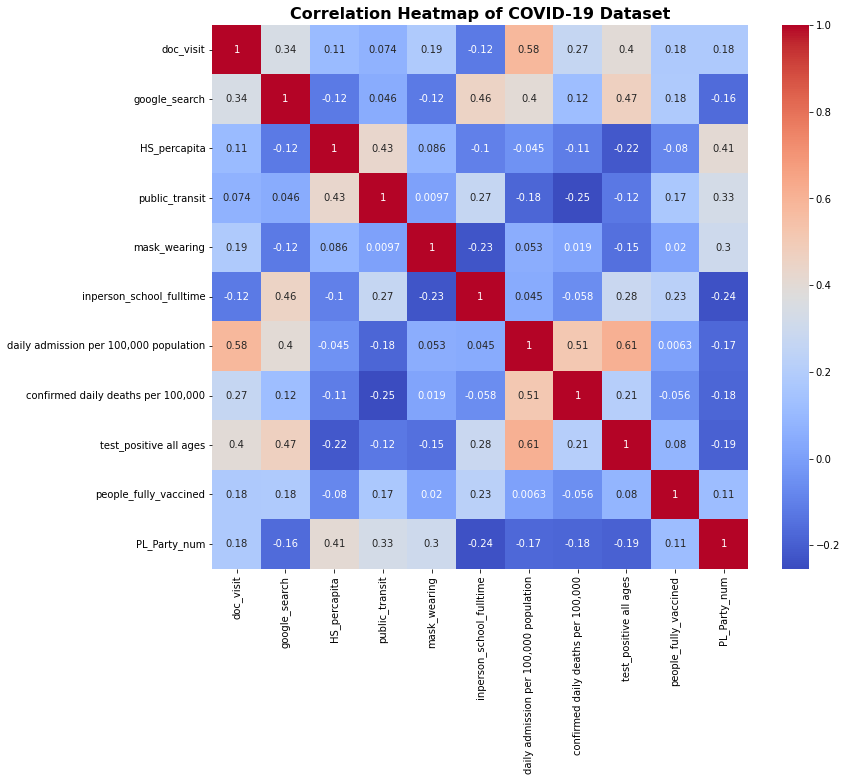

In [72]:

# Correlation Heatmap
corr = covid.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of COVID-19 Dataset", fontsize=16, fontweight='bold')
plt.show()        

#### Interpretation

None of  the two variables tend to be too highly correlated to drop for modeling.

With that being said, it is clearly shown that all the medical factors and medical results are more correlated than others: 
* daily admission Vs doc_visit : 0.58
* daily admission Vs test_positive: 0.62
* doc_visit Vs test_positive: 0.41
* confirmed death Vs daily admission: 0.51
        
Other relative high correlations includes : 
* test_positive Vs Google_search: 0.49

Other high correlations lack of an more obvious reasoning: 
* Google_search Vs in person full time: 0.63
* Public transit Vs HS_percapita   
    

## 2. Trend of health outcomes over time by region

Observing whether any region is behaving diffrently from the general trend. Thus we can be sure that one model can be applied to all the regions.

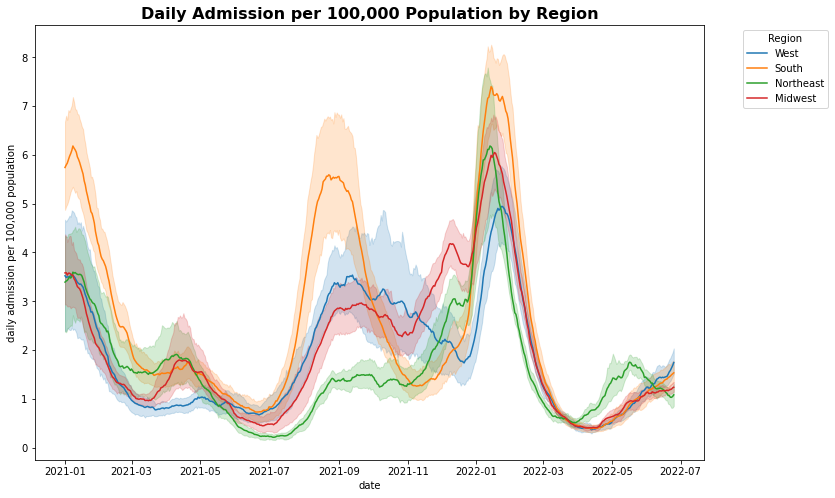

In [73]:
#Plotting By 
plt.figure(figsize=(12, 8))
sns.lineplot(data=covid, x='date', y='daily admission per 100,000 population', hue='region', legend='full')
plt.title("Daily Admission per 100,000 Population by Region", fontsize=16, fontweight='bold')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

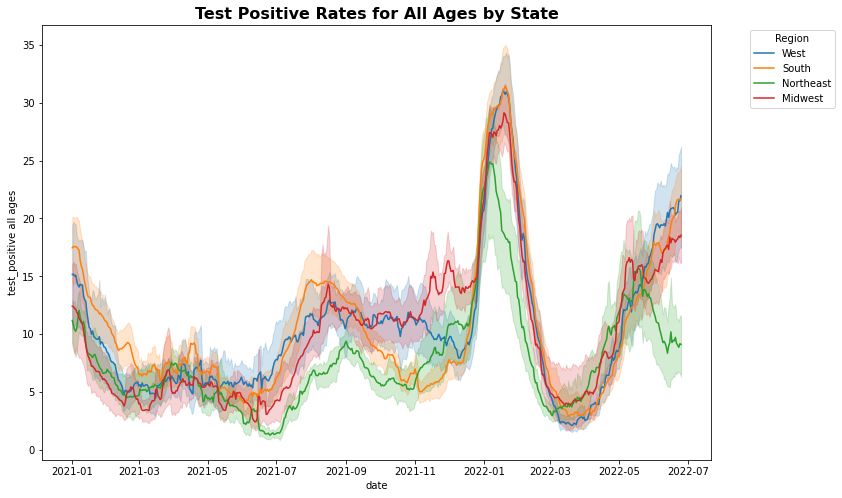

In [74]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=covid, x='date', y='test_positive all ages', hue='region', legend='full')
plt.title("Test Positive Rates for All Ages by State", fontsize=16, fontweight='bold')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')    
plt.show()

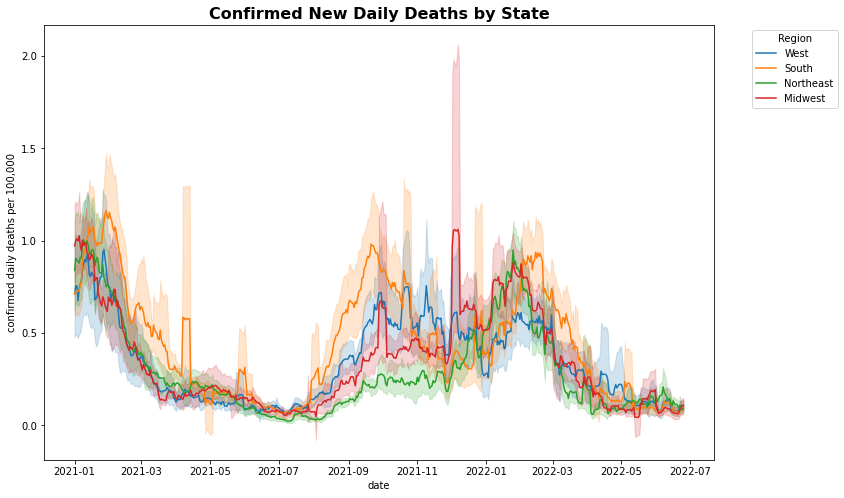

In [75]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=covid, x='date', y='confirmed daily deaths per 100,000', hue='region', legend='full')
plt.title("Confirmed New Daily Deaths by State", fontsize=16, fontweight='bold')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')    
plt.show()

### Interpretation

With both plots, we can see that all the regions tend to follow a similar trend for outcome variables. Such information gives us more confidence in prediction as no particular region needs a separate model.

### 2. Pair Plot 

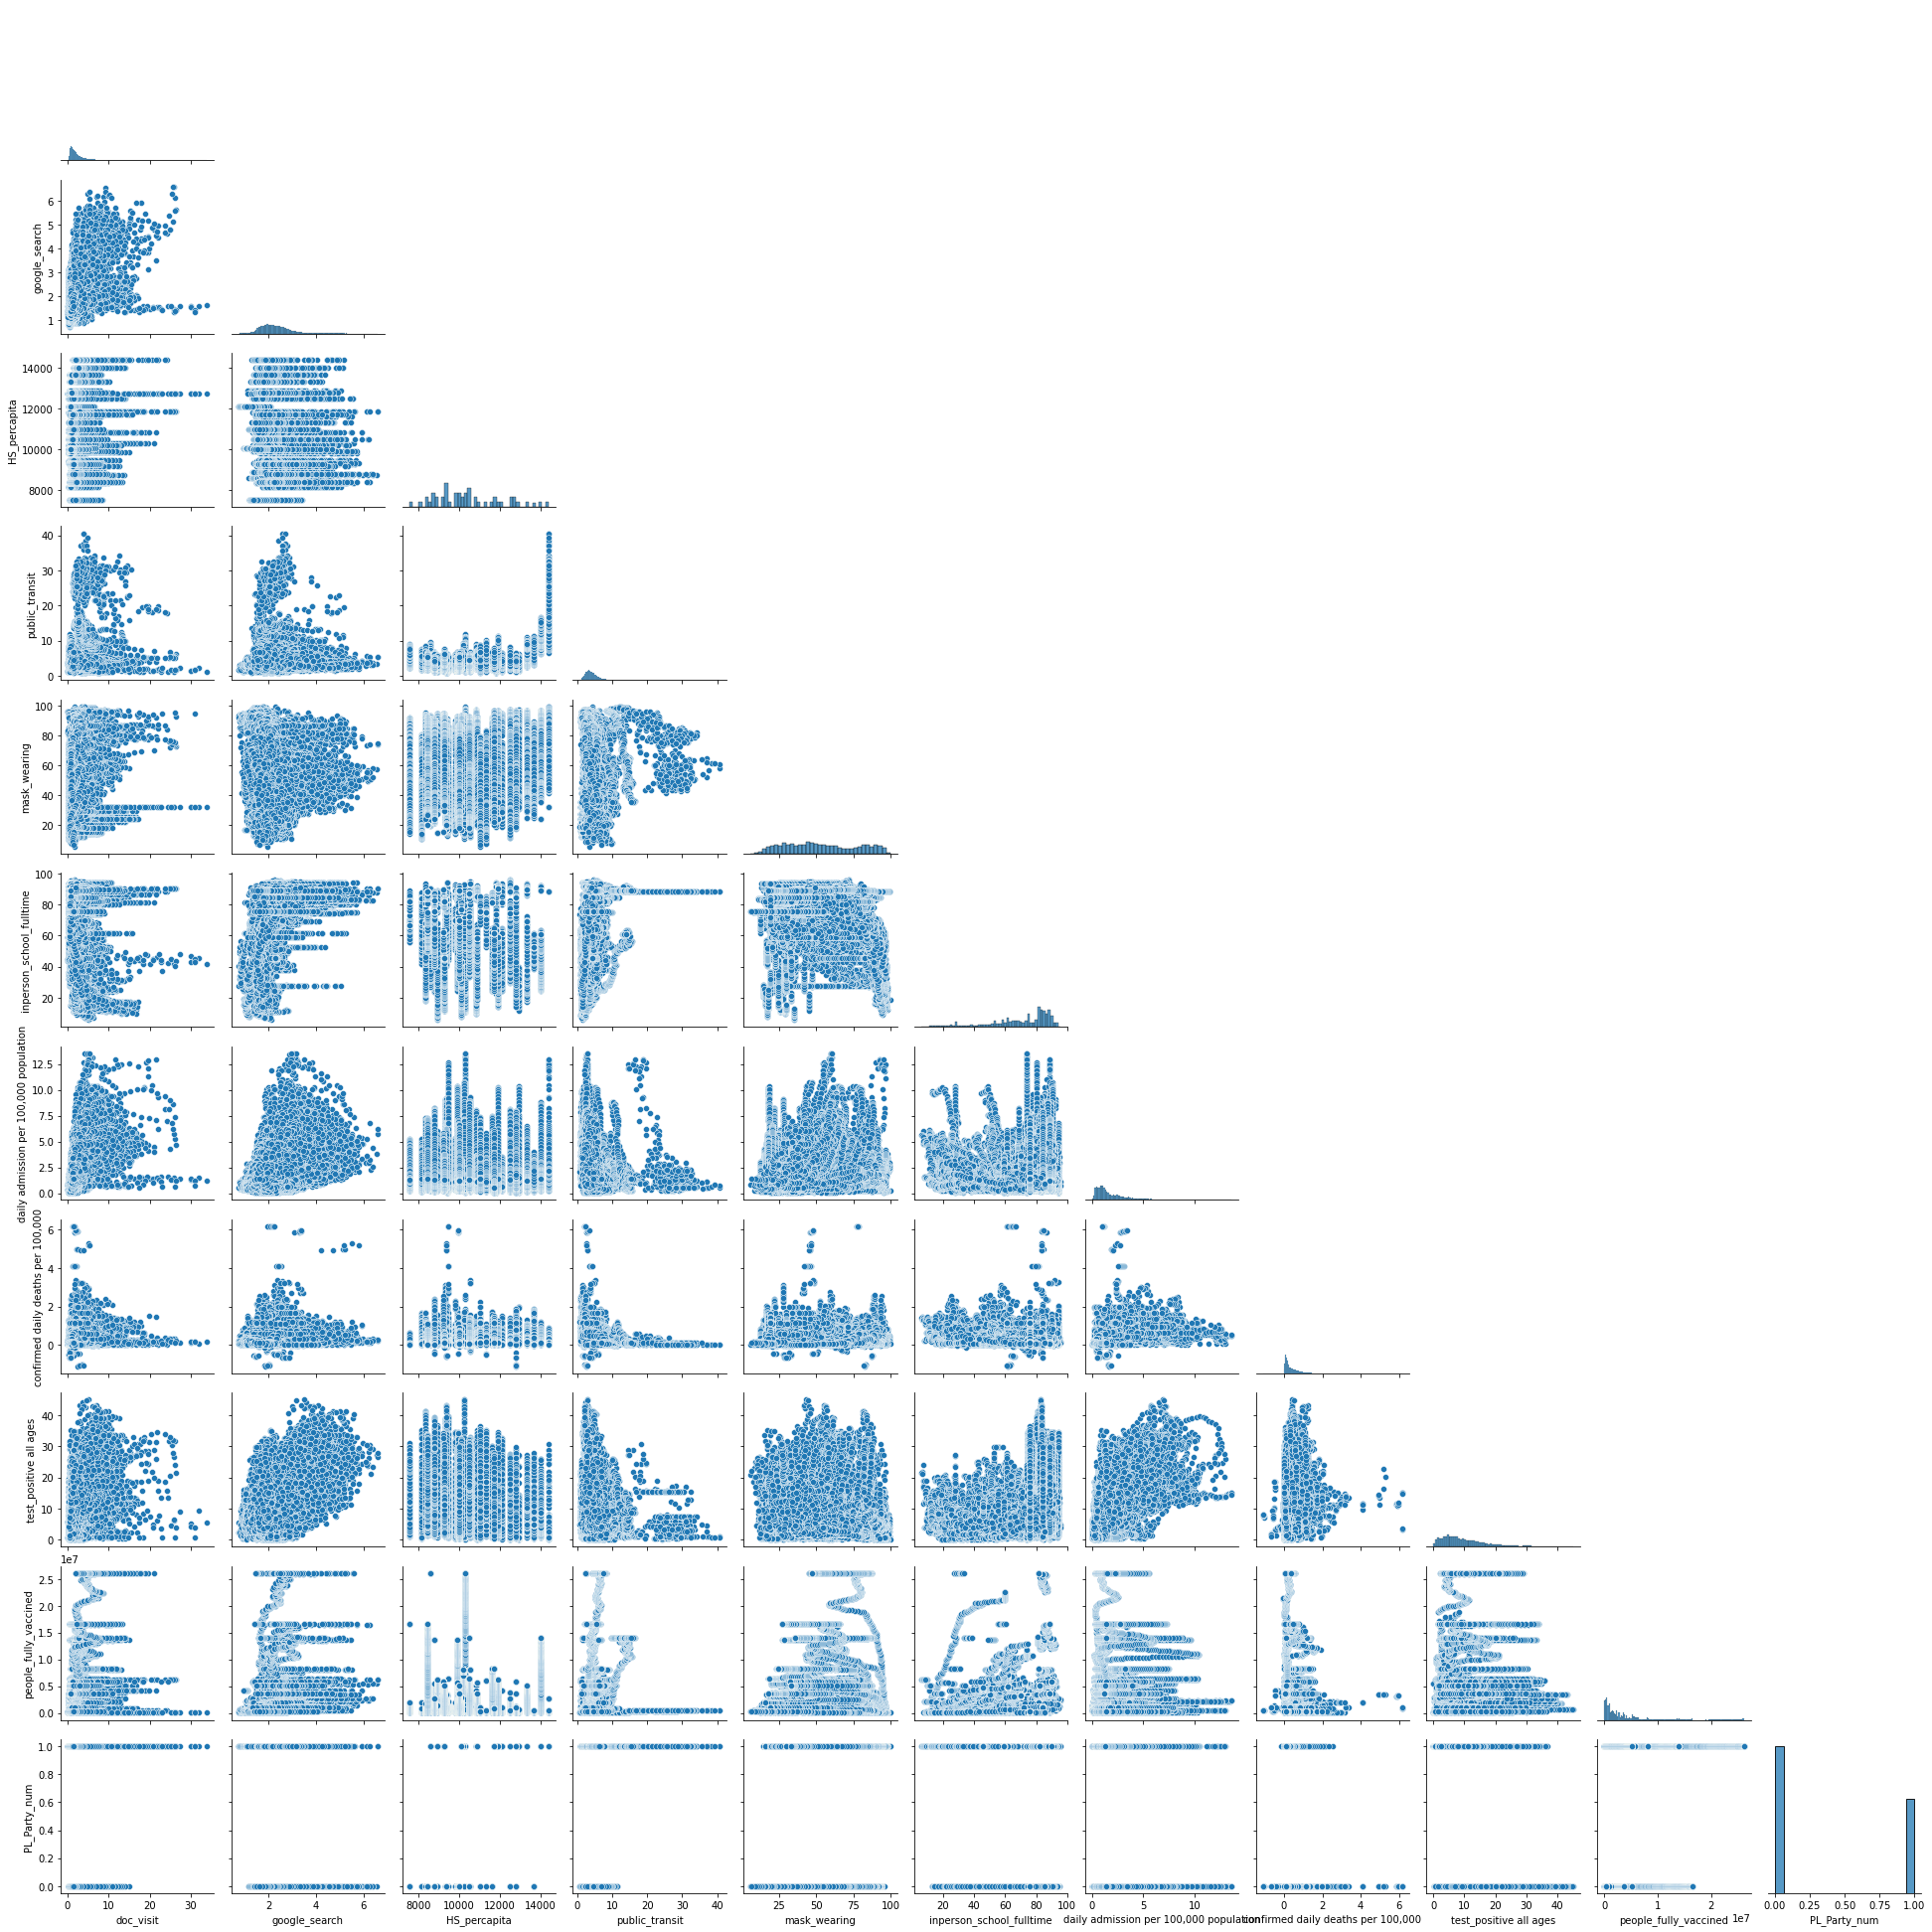

In [76]:
sns.pairplot(covid, corner = True)
plt.show()

### 3. Box plot

We are trying to observed how vaccine acceptance varied across the political inlicnation of states and also whether there was a significant difference in the obseved daily new deaths and percentage of positive tests.

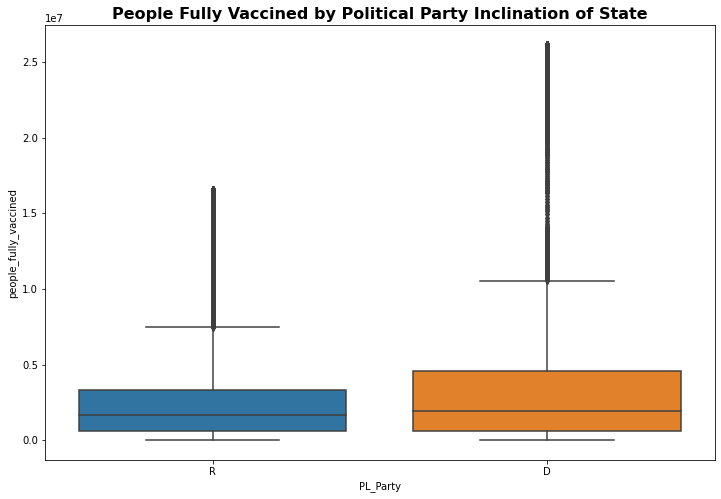

In [77]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=covid, x='PL_Party', y='people_fully_vaccined')
plt.title("People Fully Vaccined by Political Party Inclination of State", fontsize=16, fontweight='bold')
plt.show()

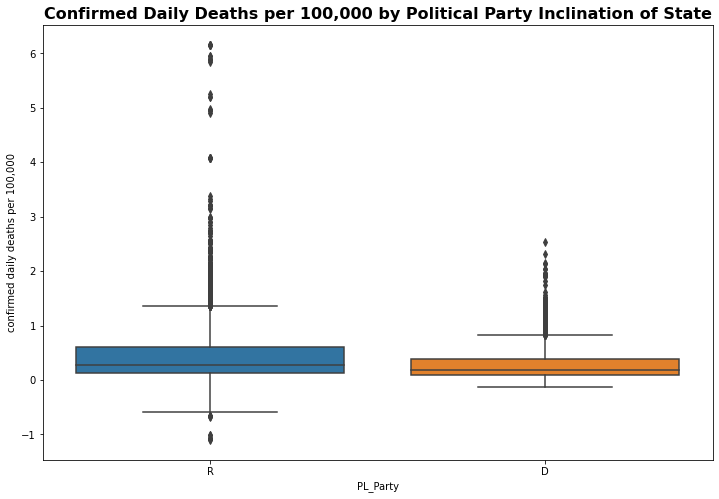

In [78]:
# Plot Daily Deaths By Party Inclination
plt.figure(figsize=(12, 8))
sns.boxplot(data=covid, x='PL_Party', y='confirmed daily deaths per 100,000')
plt.title("Confirmed Daily Deaths per 100,000 by Political Party Inclination of State", fontsize=16, fontweight='bold')
plt.show()

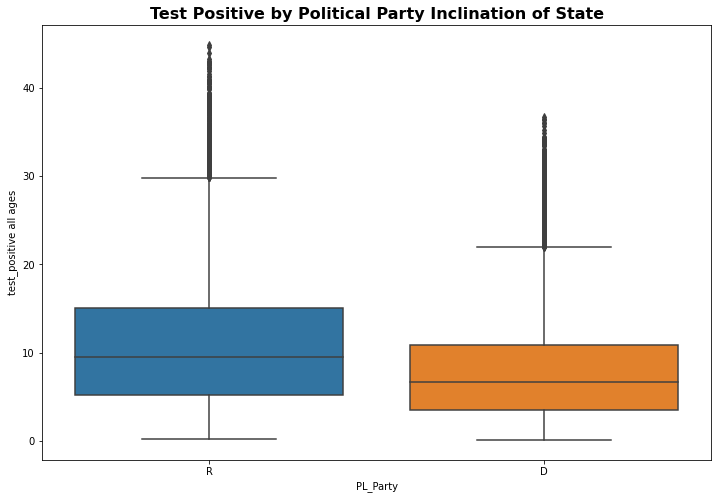

In [79]:
# Plot Test Positive By Political Party Inclination
plt.figure(figsize=(12, 8))
sns.boxplot(data=covid, x='PL_Party', y='test_positive all ages')
plt.title("Test Positive by Political Party Inclination of State", fontsize=16, fontweight='bold')
plt.show()

### Interpretation

Based on the distribution of the box plots, we observed that states with a democratic political inclinaton has higher vaccination rates on an avergae. It is also interesting to know they also have lower deaths/10000 people and  percentage of positve Covid tests than the republican states.

### 4. Bar Plot for cetain variables 


### Bar plot of the vaccine data by state, sorted by political leaning



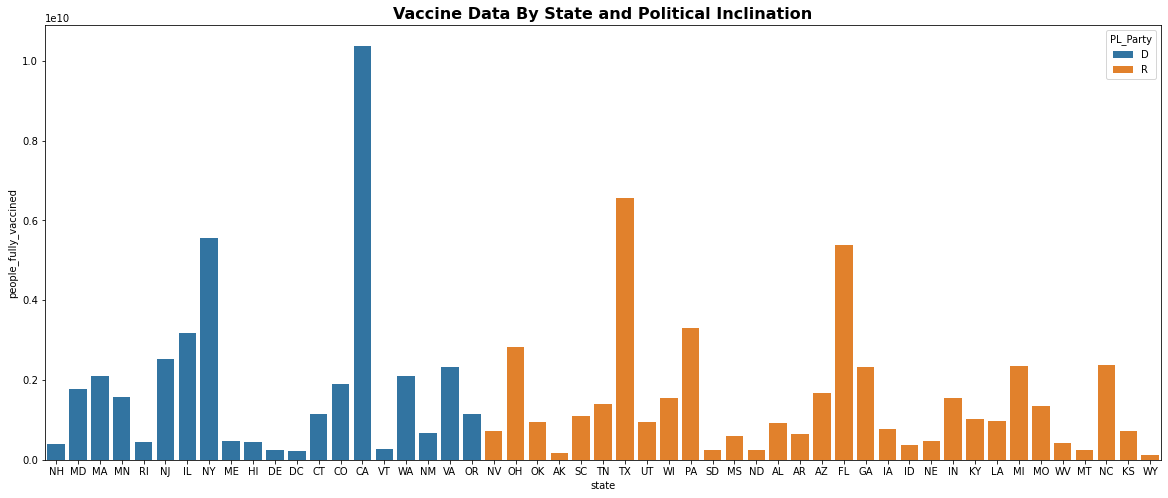

In [80]:
# Plot Vaccine Data By State
plt.figure(figsize=(20, 8))
covid_vaccination = covid.groupby(['state', 'PL_Party'])['people_fully_vaccined'].sum().reset_index()
covid_vaccination = covid_vaccination.sort_values('PL_Party')
sns.barplot(data=covid_vaccination, x='state', y='people_fully_vaccined', hue='PL_Party', dodge=False)
plt.title("Vaccine Data By State and Political Inclination", fontsize=16, fontweight='bold')
plt.show()

### Bar plot of the vaccine data by state, sorted by HS_percapita

The plot allows us to compare the vaccination rates across states with different 'Health Spend per capita. This plot helps us to see how much of an impact health care spending per capita on vaccine rates in each state.

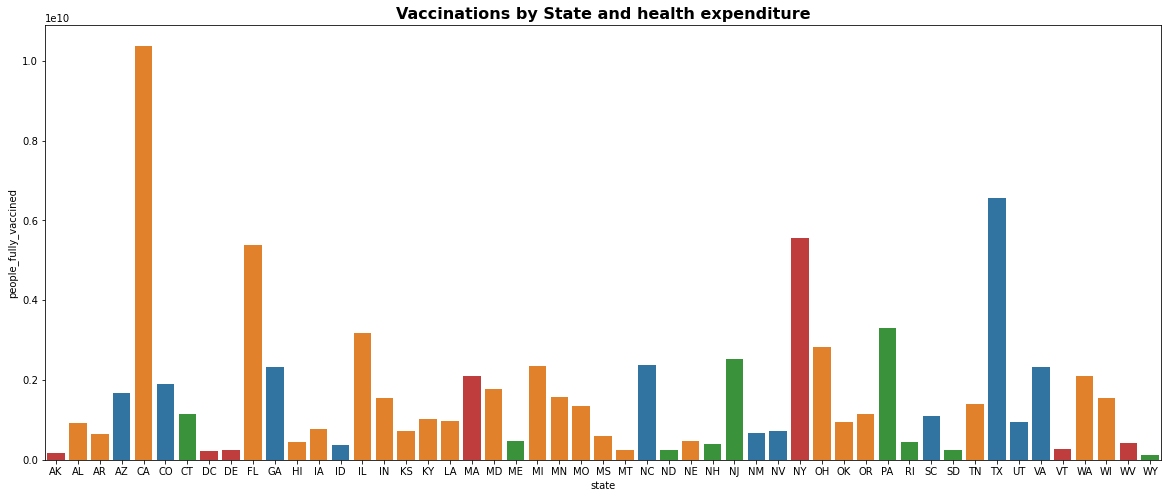

In [81]:
# Dividing the data into groups based on their health care expenditure
num_bins = 4  
covid_vaccination = covid.groupby(['state', 'HS_percapita'])['people_fully_vaccined'].sum().reset_index()
covid_vaccination['HS_percapita_bins'] = pd.cut(covid_vaccination['HS_percapita'], bins=num_bins, labels=False)


# Plot Vaccinations by state and health expenditure
plt.figure(figsize=(20, 8))
sns.barplot(data=covid_vaccination, x='state', y='people_fully_vaccined', hue='HS_percapita_bins', dodge=False)
plt.title("Vaccinations by State and health expenditure", fontsize=16, fontweight='bold')
plt.legend().remove()
plt.show()

### Interepretation 

The states data labeled with red here is state with higher HS_percapita, and blue is low HS_ per capita. We didn't observe any significant patterns here.

## Modelling

We have narrowed down on three potential target variables : 
* Postive Tests (test_positive all ages)
* Daily New Deaths (confirmed daily deaths per 100,000)
* Hospital Admissions ( daily admission per 100,000 population)

We are going to be exploring a variety of features below to predict the targets mentioned above. For the purpose of this assignement, we will be focusing on only one variable as target and compare how the other features are influencing it. 

#### Target for this assignement : 
Positive Tests
#### Features  :

doc_visit,google_search,mask_wearing,public_transit,inperson_school_fulltime,PL_Party,HS_percapita,people_fully_vaccined,Political_Leaning

In [82]:
covid.info()
covid.to_csv('covid_cleaned.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27552 entries, 39 to 27590
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   state                                   27552 non-null  object        
 1   date                                    27552 non-null  datetime64[ns]
 2   doc_visit                               27552 non-null  float64       
 3   google_search                           27552 non-null  float64       
 4   HS_percapita                            27552 non-null  float64       
 5   Political_Leaning                       27552 non-null  object        
 6   region                                  27552 non-null  object        
 7   public_transit                          27552 non-null  float64       
 8   mask_wearing                            27552 non-null  float64       
 9   inperson_school_fulltime                27552 non

### Feature Engineering

In [99]:

covid_model = covid.copy()
# Re-indexing the dataframe to do TimeSeries Split later
covid_model.set_index('date', inplace=True)
covid_model.sort_index(inplace=True)

#Split Features and Targte
X = covid_model[['doc_visit','google_search','mask_wearing','public_transit','inperson_school_fulltime','PL_Party_num','HS_percapita','people_fully_vaccined','Political_Leaning']]
y = covid_model['test_positive all ages']


#### Splitting into Train and Test
Because of the time based nature of the data, to split by train  and test effectively we will be using TimeSeriesSplit. It maintains the randomness of the split without compromising on the logical fact that we cannot train on "future" data. 

In [100]:
# Split into Train and Test (Reference Linked Below)
tss = TimeSeriesSplit(n_splits = 3)
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

y_test

date
2022-02-10     7.236842
2022-02-10    12.444018
2022-02-10    16.316894
2022-02-11    15.454546
2022-02-11     9.970238
                ...    
2022-06-25    20.606293
2022-06-25    22.491979
2022-06-25    11.309524
2022-06-25    24.418843
2022-06-25    22.025542
Name: test_positive all ages, Length: 6888, dtype: float64

#### Scaling

Using the Standard Scaler to standardize all the features

In [101]:
#Initializing Scaler
scaler = StandardScaler(with_mean=True)

#Leaving out country because it is categorical
S_X_train = scaler.fit_transform(X_train)
S_X_test = scaler.fit_transform(X_test)

### Model Selection and Validation

#### Linear Regression

In [102]:
# Initialize Model
lm = LinearRegression()
# Fit Model
lm.fit(X_train,y_train)
print("Training R-squared: ", lm.score(X_train, y_train))
print("Testing R-squared: ", lm.score(X_test, y_test))

Training R-squared:  0.5016732932457197
Testing R-squared:  0.0325277304061764


In [103]:
# Test Model
train_pred = lm.predict(X_train)
test_pred = lm.predict(X_test)

print('Training Mean squared error: %.2f'% mean_squared_error(y_train, train_pred))
print('Testing Mean squared error: %.2f'% mean_squared_error(y_test, test_pred))

Training Mean squared error: 26.51
Testing Mean squared error: 48.49


#### Interpretation

The relationship between these variables might not be explained by linear regression at all. Thus we are facing issues like this. We might use polyregression and feature selecction to improve results

#### Decision Tree 

In [111]:
# Initialize Model
tree= DecisionTreeRegressor(random_state=17)

In [112]:
# Fit Model
tree.fit(X_train, y_train)

train_pred_dt = tree.predict(X_train)
test_pred_dt = tree.predict(X_test)

# Calculate R-squared scores
train_r2_dt = r2_score(y_train, train_pred_dt)
test_r2_dt = r2_score(y_test, test_pred_dt)

# Calculate Mean Squared Errors
train_mse_dt = mean_squared_error(y_train, train_pred_dt)
test_mse_dt = mean_squared_error(y_test, test_pred_dt)



In [113]:
# Test Model
print("Training R-squared (Decision Tree): ", train_r2_dt)
print("Testing R-squared (Decision Tree): ", test_r2_dt)
print('Training Mean squared error (Decision Tree): %.2f' % train_mse_dt)
print('Testing Mean squared error (Decision Tree): %.2f' % test_mse_dt)

Training R-squared (Decision Tree):  1.0
Testing R-squared (Decision Tree):  -0.021062572220826414
Training Mean squared error (Decision Tree): 0.00
Testing Mean squared error (Decision Tree): 51.18


#### Interpretation

This model is completely overfit on training and performing poorly on test thus we need to select features better and look into combining a few features to see if that creates an impact. Additionally we could use bagging and boosting for better results. Random forest might help too to avoid overfitting


# Reference
* Covidcast Data: https://cmu-delphi.github.io/delphi-epidata/api/covidcast_signals.html
* Healthcare Expenditure per capita : https://www.kff.org/other/state-indicator/health-spending-per-capita/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D 
* Political Leaning Data: https://fivethirtyeight.com/features/how-red-or-blue-is-your-state-your-congressional-district/
* Syntax: Mini2 EDA class homework 1 
* Prediction: machine learning midterm prediction part
* DataFrame Merge: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Formatting: https://sparkbyexamples.com/pandas/how-to-format-pandas datetime/#:~:text=The%20default%20format%20of%20the%20datetime%20which%20is%20generated%20using,strftime()%20function.
* Delphi Covid Data: https://cmu-delphi.github.io/delphi-epidata/api/covidcast.html
* Political Leaning: https://fivethirtyeight.com/features/how-red-or-blue-is-your-state-your-congressional-district/
* Healthcare Expenditure : https://www.kff.org/other/state-indicator/health-spending-per-capita/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
* dtype changing https://stackoverflow.com/questions/15891038/change-column-type-in-pandas#:~:text=The%20best%20way%20to%20convert,floating%2Dpoint%20numbers%20as%20appropriate.
* general plotting https://seaborn.pydata.org/
* for loop for plotting: https://datascience.stackexchange.com/questions/84840/how-to-create-multiple-subplots-scatterplot-in-for-loop


* Time Series Split : https://medium.com/@Stan_DS/timeseries-split-with-sklearn-tips-8162c83612b9

